# Background

Climate Change is one of the biggest threats to our planet, so I decided to predict the average land temperature in the future. I chose three periods which I based on in creating my models. The reason behind creating three models is the different temperature growth rates throughout nearly 3 centuries. Data in the 18th and 19th centuries are also more distracted than nowadays. It can be a consequence of worse measure technology.

# Content:
1. [Setup](#1)
2. [EDA](#2)
3. [Trends](#3)
    * [Create a Trend Feature](#3.1)
4. [Linear Regression:](#4)
    * [1750 - 2015](#4.1)
    * [1850 - 2015](#4.2)
    * [1950 - 2015](#4.3)

# <a id="1">Setup</a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from learntools.time_series.style import *

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


In [2]:
temperatures = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

# <a id="2">EDA</a>

In [3]:
temperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
max(temperatures.dt)

'2015-12-01'

In [5]:
temperatures.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [6]:
temperatures.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


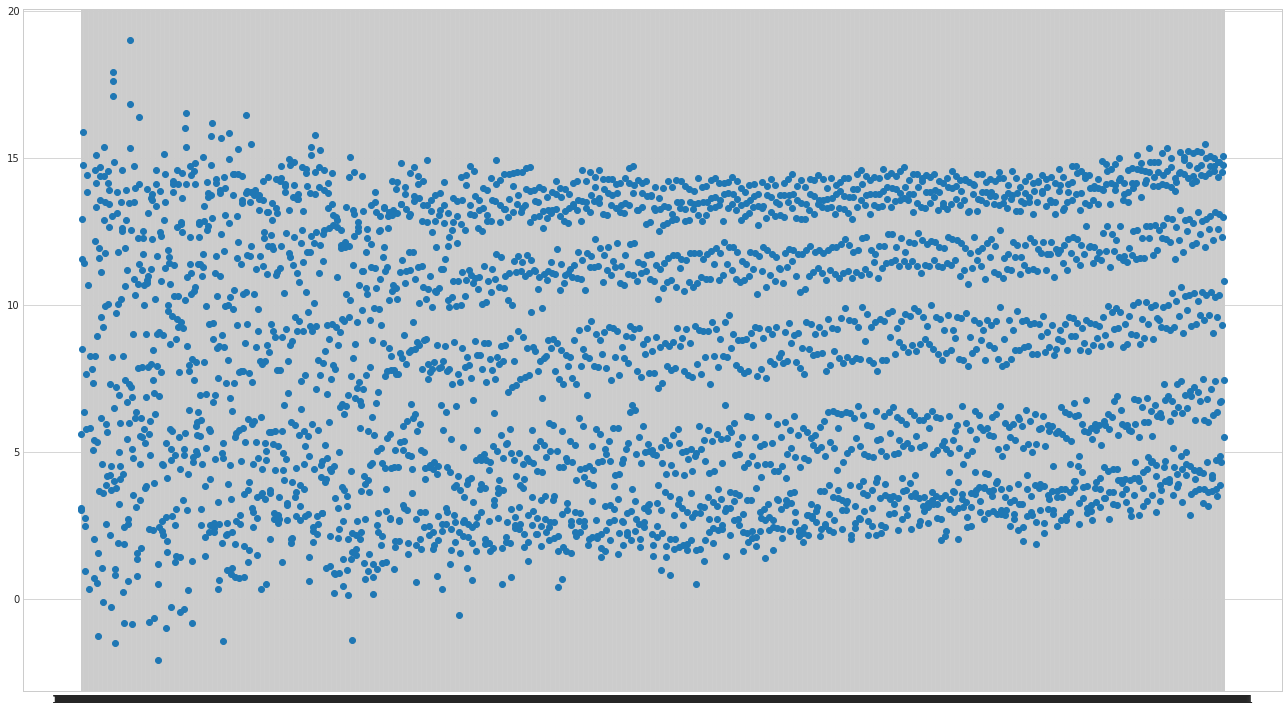

In [7]:
plt.figure(figsize=(18,10))
plt.scatter(data = temperatures, x = 'dt',y = 'LandAverageTemperature')
plt.show()

In [8]:
temperatures['Date'] = pd.to_datetime(temperatures.dt, format='%Y-%d-%m')
temperatures['Year'] = temperatures['Date'].dt.year
temperatures['Date'] = temperatures['Date'].map(dt.datetime.toordinal)

In [9]:
df = temperatures.groupby('Year')['LandAverageTemperature'].mean().reset_index()

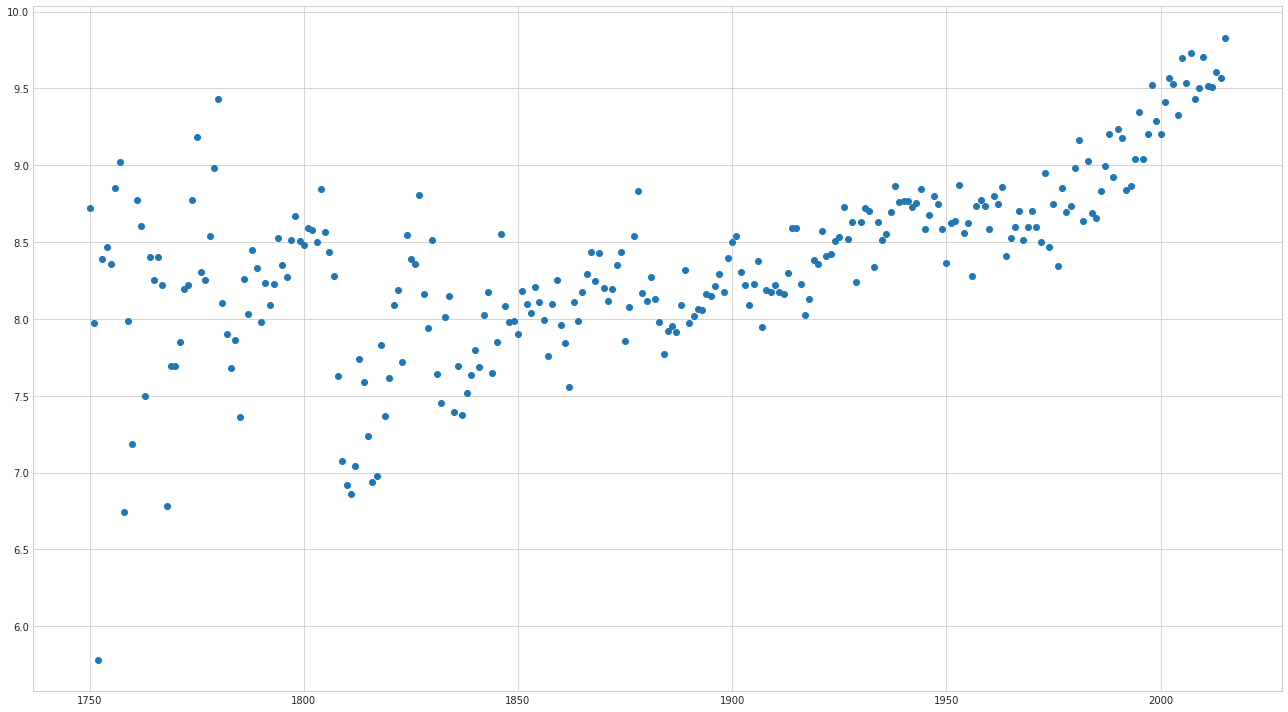

In [10]:
plt.figure(figsize=(18,10))
plt.scatter(data = df, x = 'Year',y = 'LandAverageTemperature')
plt.show()

# <a id="3">Trends</a>

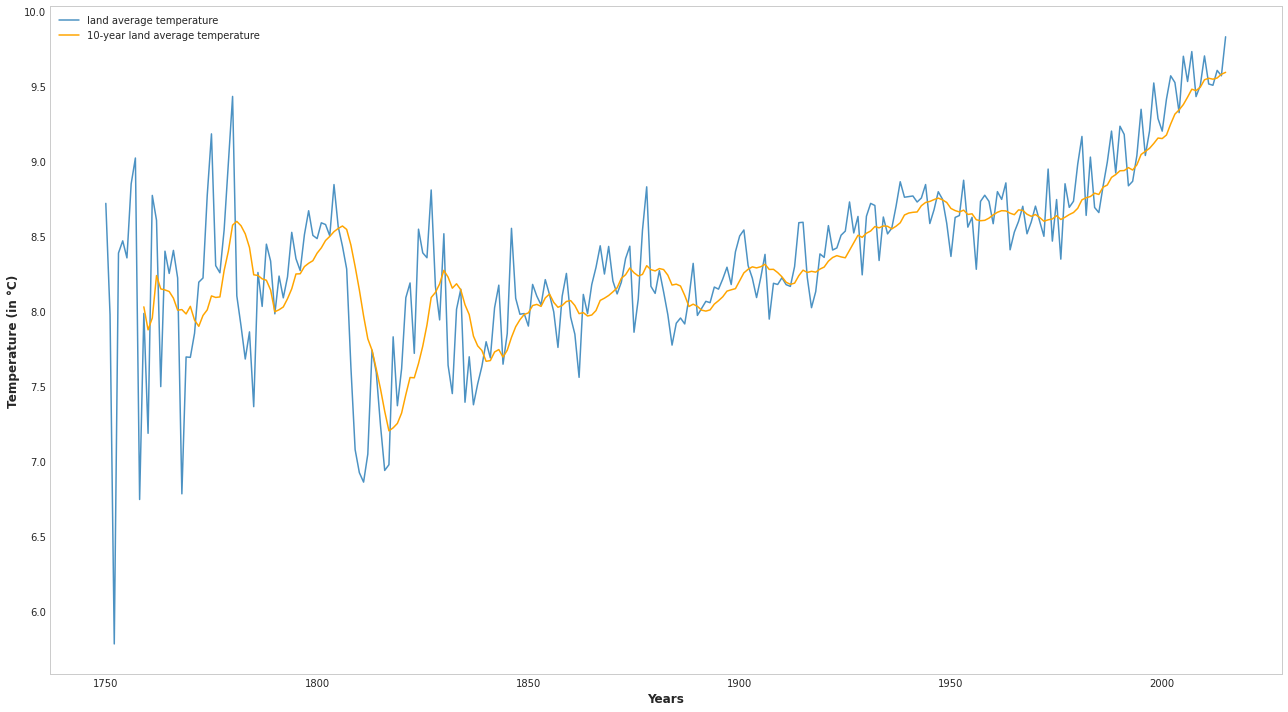

<Figure size 792x288 with 0 Axes>

In [11]:
temperature_px = df['LandAverageTemperature']
df['10'] = temperature_px.rolling(window=10).mean()

plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.plot(df['LandAverageTemperature'], alpha=0.8, label='land average temperature')
ax.plot(df['10'], color="orange", label='10-year land average temperature')
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.grid()
plt.legend()
plt.show()
plt.clf()

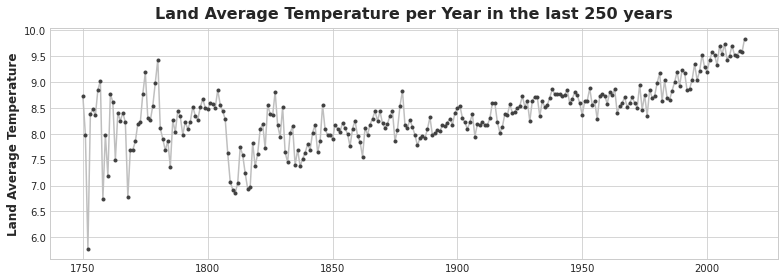

In [12]:
ax = df['LandAverageTemperature'].plot(**plot_params)
ax.set(title="Land Average Temperature per Year in the last 250 years", ylabel="Land Average Temperature")
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.show()

## <a id="3.1">Create a Trend Feature</a>

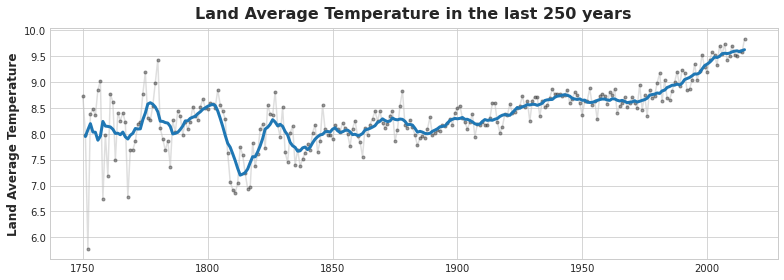

In [13]:
trend = df['LandAverageTemperature'].rolling(
    window=10,
    center=True,
    min_periods=6,
).mean()

ax = df['LandAverageTemperature'].plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
ax.set(title="Land Average Temperature in the last 250 years", ylabel="Land Average Temperature")
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.show()

In [14]:
from statsmodels.tsa.deterministic import DeterministicProcess

average_temperature = temperatures.groupby('Year').mean()['LandAverageTemperature']
y = average_temperature.copy()  # the target

# YOUR CODE HERE: Instantiate `DeterministicProcess` with arguments
# appropriate for a cubic trend model
dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)

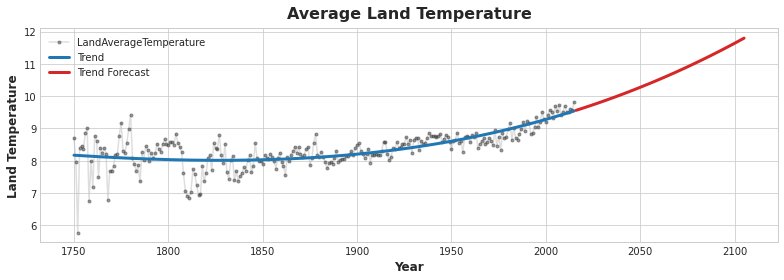

In [15]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Land Temperature", ylabel="Land Temperature")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

# <a id="4">Linear Regression</a>

## <a id="4.1">Data from 1750 - 2015</a>

In [16]:
corr, p = pearsonr(df['Year'], df['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.6223364823755806


Strong positive correlation

In [17]:
lr = LinearRegression()

In [18]:
X = df['Year']
y = df['LandAverageTemperature']

X = X.values.reshape(-1,1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [20]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.34971225350982016

In [21]:
y_pred = lr.predict(X_test)

In [22]:
years = pd.DataFrame(X_test)

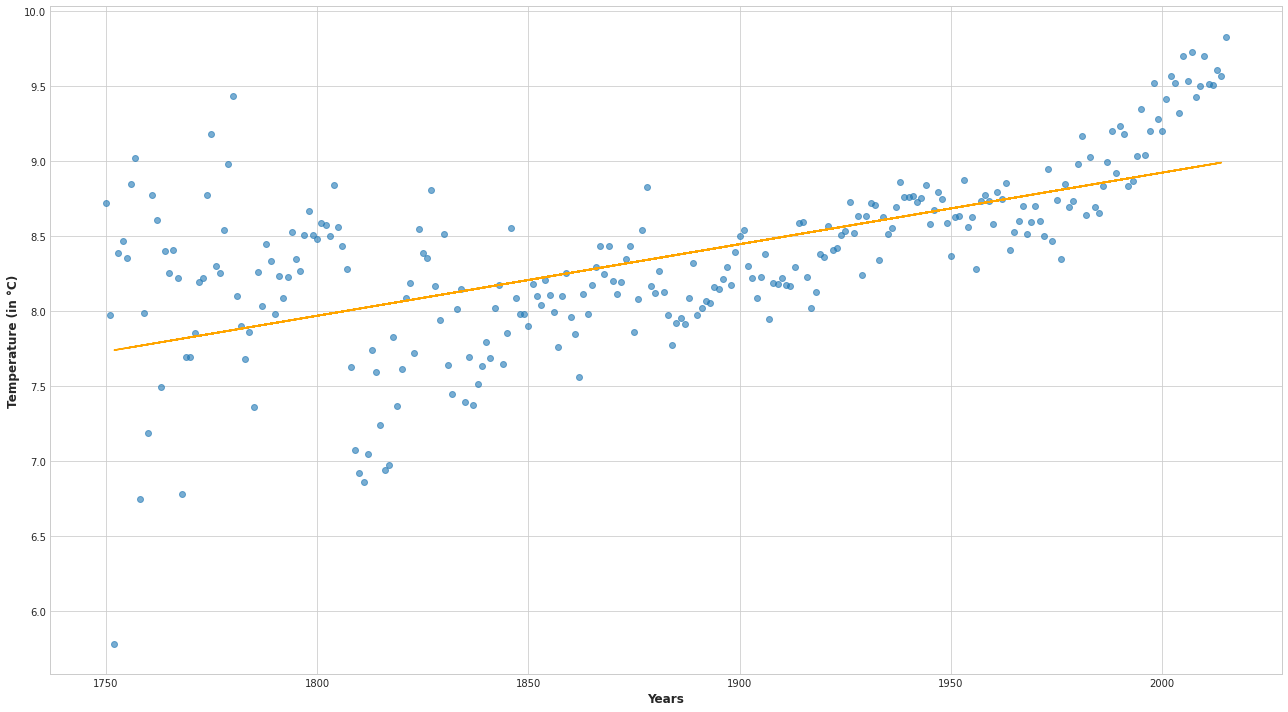

<Figure size 792x288 with 0 Axes>

In [23]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [24]:
print(lr.coef_)
print(10 * lr.coef_)

[0.00477597]
[0.04775967]


In [25]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[9.06788828 9.16340762]


#### Interpretation

Every year, the average land temperature increases by an average of 0.0047 °C. Every ten years, the average land temperature increases by an average of 0.0475 °C.
The average land temperature in 2030 will be 9.0572 °C and in 2050 9.1521 °C.

## <a id="4.2">Data from 1850 - 2015</a>

In [26]:
corr, p = pearsonr(df[df['Year'] >= 1850]['Year'], df[df['Year'] >= 1850]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.865681931251089


Very strong positive correlation

In [27]:
lr = LinearRegression()

In [28]:
X = df[df['Year'] >= 1850]['Year']
y = df[df['Year'] >= 1850]['LandAverageTemperature']

X = X.values.reshape(-1,1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [30]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7741978245363289

In [31]:
y_pred = lr.predict(X_test)

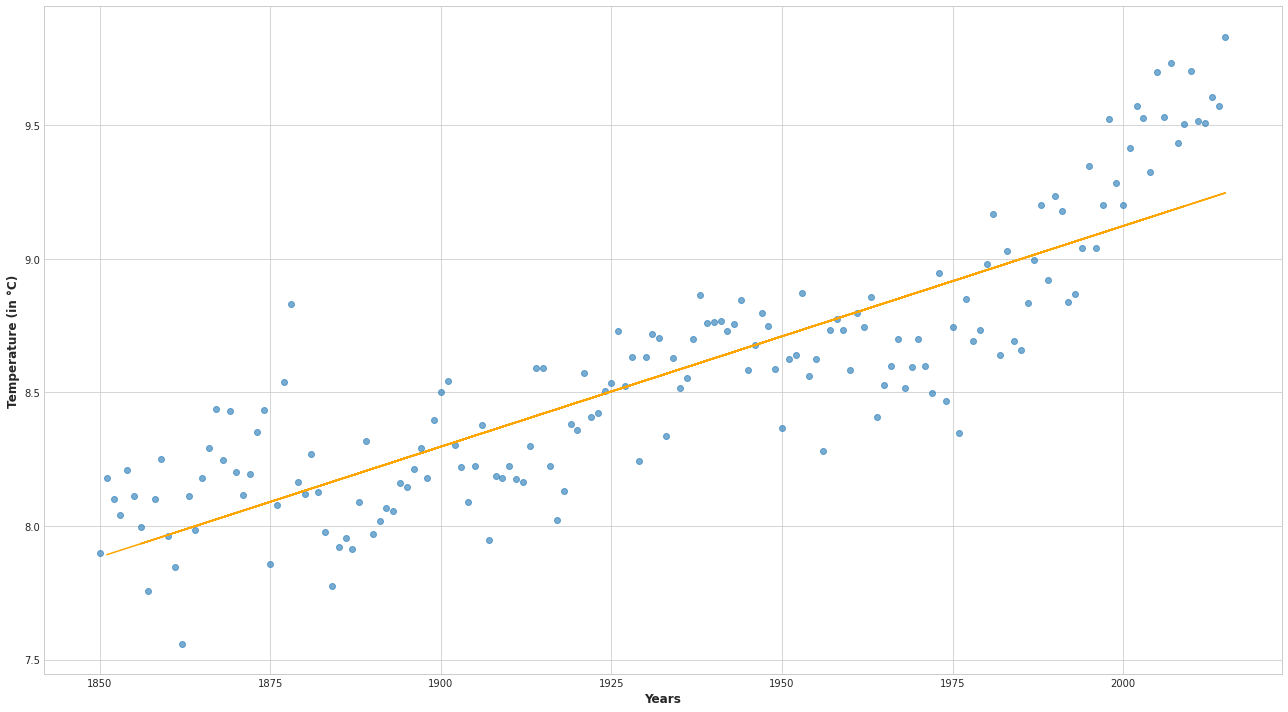

<Figure size 792x288 with 0 Axes>

In [32]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [33]:
print(lr.coef_)
print(10 * lr.coef_)

[0.00825671]
[0.08256714]


In [34]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[9.37050336 9.53563764]


#### Interpretation

Every year, the average land temperature increases by an average of 0.0084 °C. Every ten years, the average land temperature increases by an average of 0.0843 °C.
The average land temperature in 2030 will be 9.4019 °C and in 2050 9.5706 °C.

## <a id="4.3">Data from 1950 - 2015</a>

In [35]:
corr, p = pearsonr(df[df['Year'] >= 1950]['Year'], df[df['Year'] >= 1950]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.8698038878923113


Very strong positive correlation

In [36]:
lr = LinearRegression()

In [37]:
X = df[df['Year'] >= 1950]['Year']
y = df[df['Year'] >= 1950]['LandAverageTemperature']

X = X.values.reshape(-1,1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [39]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7764178625247473

In [40]:
y_pred = lr.predict(X_test)

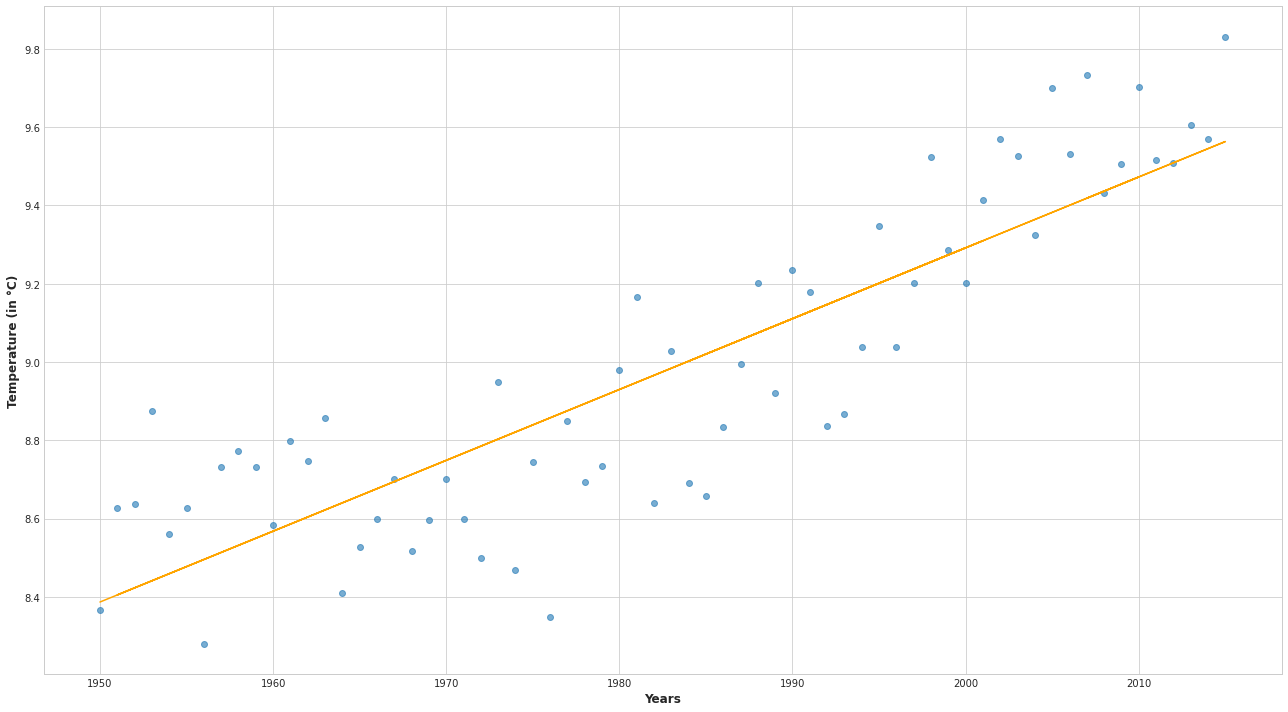

<Figure size 792x288 with 0 Axes>

In [41]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [42]:
print(lr.coef_)
print(lr.coef_ * 10)

[0.0181013]
[0.18101304]


In [43]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[ 9.83477965 10.19680573]


#### Interpretation

Every year, the average land temperature increases by an average of 0.0201 °C. Every ten years, the average land temperature increases by an average of 0.2009 °C.
The average land temperature in 2030 will be 9.9087 °C and in 2050 10.3106 °C.